In [38]:
# ①
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
# ②
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [40]:
# ③
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
# ④
# "Object"を削除する
train_not_object = train.select_dtypes(exclude='object')
test_not_object = test.select_dtypes(exclude='object')

In [42]:
# ⑤
train_not_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [43]:
# ⑥
test_not_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtFinSF2     1458 non-null   float64
 11  BsmtUnfSF      1458 non-null   float64
 12  TotalBsmtSF    1458 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1457 non-null   float64
 18  BsmtHalf

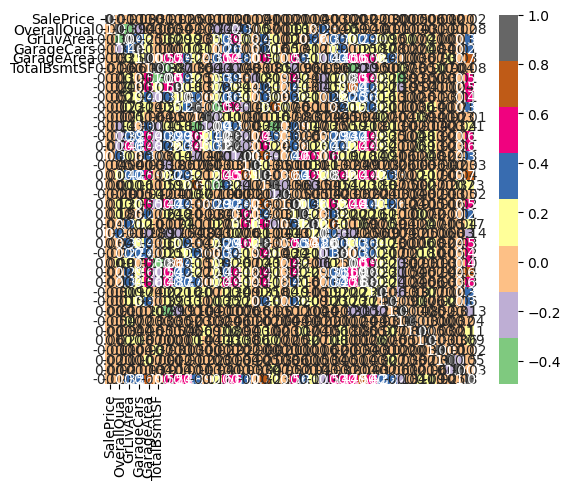

In [44]:
# ⑦
# ヒートマップで相関が高い５個のデータに絞る
# cbar:相関図の右にある数値の大小を示しやすくするために挿入できる棒
# annot:TrueにすることでBOXの中に数値を表示させることができる
# square:Trueにすると一つ一つの枠が正方形になって見やすい
# fmt:枠の中の文字列に与えるルールで、.2fとすると少数第２点までを表示
# annot_kws:Trueの時の文字列操作
# cmap:カラーコード
corr = train_not_object.corr()
k=6
topfive = corr.nlargest(k, 'SalePrice')['SalePrice'].index
heatmap = sns.heatmap(corr,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},yticklabels=topfive.values,xticklabels=topfive.values,cmap='Accent')


In [45]:
# ⑧
# 学習データの欠損値
train_not_object.isnull().sum()[train_not_object.isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [46]:
# ⑨
# テストデータの欠損値
test_not_object.isnull().sum()[test_not_object.isnull().sum() > 0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [51]:
# ⑩
test_not_object = test_not_object.dropna(subset = ['GarageCars', 'GarageArea'])

In [52]:
# ⑪
test_not_object.isnull().sum()[test_not_object.isnull().sum() > 0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      77
dtype: int64

In [56]:
# ⑫
# 学習データの特徴量、目的変数を取得
train_features = train_not_object[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotRmsAbvGrd']].values
train_target = train_not_object['SalePrice'].values
# テストデータの特徴量を取得
test_features = test_not_object[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotRmsAbvGrd']].values

In [59]:
# ⑬
# 線形回帰分析
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [60]:
# ⑭
# 予測モデルの学習
model.fit(train_features, train_target)

LinearRegression()

In [61]:
# ⑮
# テストデータによる予測(※テストデータの編集が必要)
predict_test_target = model.predict(test_features)
# print(predict_test_target)

In [62]:
# ⑯
print(predict_test_target)

[121367.80257195 153577.71594771 162143.70520157 ... 141047.89513664
  82694.74673691 248087.10241822]


In [64]:
# ⑰
# 提出フォーマットに変換
submission = pd.DataFrame({'Id': test_not_object['Id'], 'SalePrice': predict_test_target})
submission.to_csv("submission_HousePrices_AdvancedRegressionTechniques_1.csv", index=False)